In [255]:

### load library 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# missing data vis 
import missingno


## Plotint setting 
%matplotlib inline
sns.set(style="white",palette= "muted")
sns.set_context("talk", font_scale=0.9)#, rc={"lines.linewidth": 1})


### for ttest 


# predict employee retention and understand its main drivers


In [344]:
df = pd.read_csv("./employee_retention_data.csv")

In [4]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


#### Task1
Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate
employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13.
That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have
already quit, then company headcount on 2012/03/02 for company 1 would be 1000.
#### Task2 
You should create a table with 3 columns: day, employee_headcount, company_id.
What are the main factors that drive employee churn? Do they make sense? Explain your
findings.
#### Task3
If you could add to this data set just one variable that could help explain employee churn,
what would that be?

In [6]:
df.describe(include=['object'])

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [8]:
df.describe(include=['object'])

,dept,join_date,quit_date
count,24702,24702,13510
unique,6,995,664
top,customer_service,2012-01-03,2015-05-08
freq,9180,105,111


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee_id  24702 non-null  float64
 1   company_id   24702 non-null  int64  
 2   dept         24702 non-null  object 
 3   seniority    24702 non-null  int64  
 4   salary       24702 non-null  float64
 5   join_date    24702 non-null  object 
 6   quit_date    13510 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB



Preview of data with null values:
xxxxxxxxxxxxx
   employee_id  company_id              dept  seniority    salary   join_date  \
2     927315.0           4         marketing         14  101000.0  2014-10-13   
6      88600.0           4  customer_service         21  107000.0  2013-10-21   
7     716309.0           2  customer_service          4   30000.0  2014-03-05   

  quit_date  
2       NaN  
6       NaN  
7       NaN  


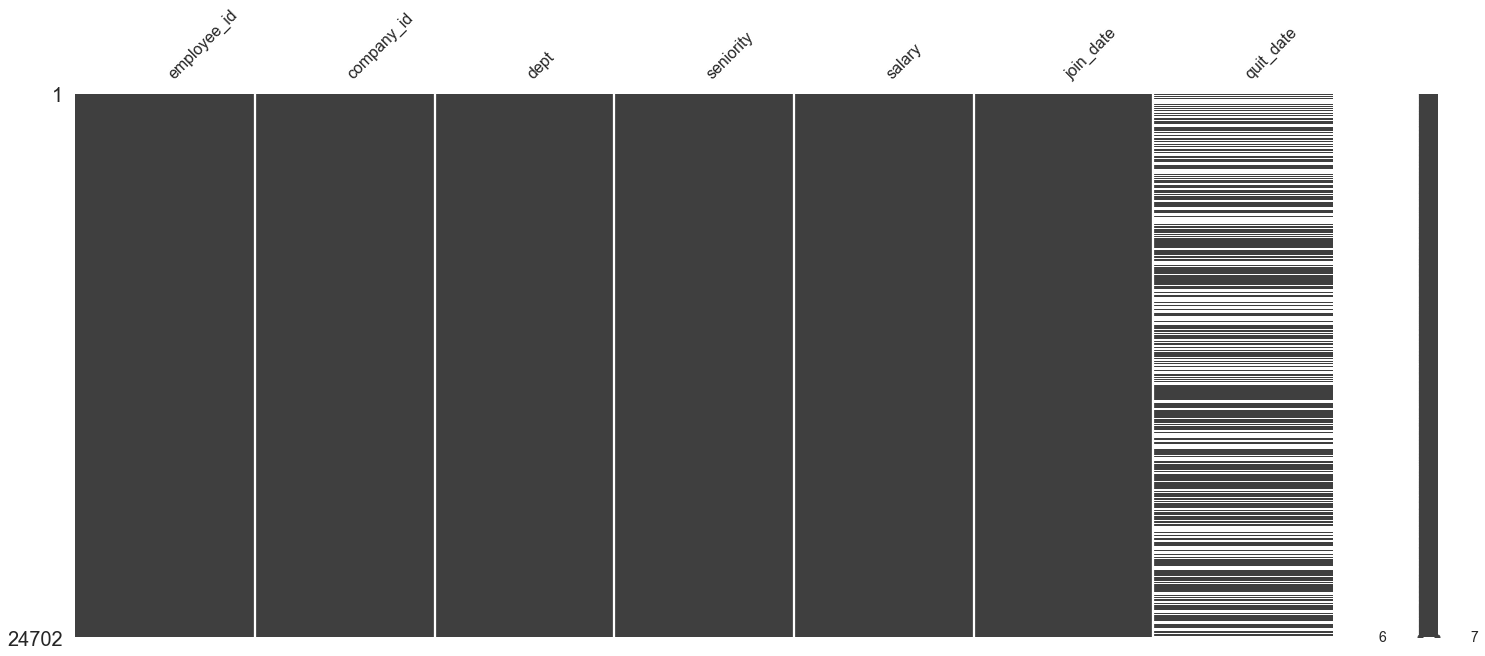

In [9]:
if len(df[df.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix((df))
    plt.show()

In [11]:
df.columns

Index(['employee_id', 'company_id', 'dept', 'seniority', 'salary', 'join_date',
       'quit_date'],
      dtype='object')

In [345]:
df['q_date']= pd.DatetimeIndex(df['quit_date'])
df['j_date']= pd.DatetimeIndex(df['join_date'])


In [316]:
df[df['j_date']=="2015-11-10"]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,q_date,j_date
182,565100.0,7,engineer,5,155000.0,2015-11-10,NaN,NaT,2015-11-10
5334,525124.0,6,engineer,14,152000.0,2015-11-10,NaN,NaT,2015-11-10
14622,284488.0,2,data_science,14,245000.0,2015-11-10,NaN,NaT,2015-11-10
17417,472114.0,2,data_science,28,231000.0,2015-11-10,NaN,NaT,2015-11-10
18941,632648.0,2,sales,10,143000.0,2015-11-10,NaN,NaT,2015-11-10
20026,123149.0,1,marketing,24,209000.0,2015-11-10,NaN,NaT,2015-11-10
21460,526969.0,2,marketing,1,51000.0,2015-11-10,NaN,NaT,2015-11-10


In [313]:
df

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,q_date,j_date,quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,2015-10-30 00:00:00,2014-03-24,1
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,2014-04-04 00:00:00,2013-04-29,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,0,0,2014-10-13,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,2013-06-07 00:00:00,2012-05-14,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,2014-08-22 00:00:00,2011-10-17,1
...,...,...,...,...,...,...,...,...,...,...
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,0,0,2015-02-18,0
24698,590087.0,4,engineer,10,160000.0,2015-10-26,0,0,2015-10-26,0
24699,777612.0,4,customer_service,11,67000.0,2013-09-03,2015-10-23,2015-10-23 00:00:00,2013-09-03,1
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09,2015-01-09 00:00:00,2011-12-13,1


In [317]:
df_jcount = df.groupby(['j_date','company_id']).count().reset_index()
df_qcount = df.groupby(['q_date','company_id']).count().reset_index()

In [318]:
df_retention = pd.DataFrame({'date': list(pd.date_range("2011-01-24","2015-12-13"))})
c_list = pd.DataFrame({"company_id" :  list(df['company_id'].unique())})

# cartician product 
df_retention['key'],c_list['key'] = 0,0 
df_retention = pd.merge(df_retention,c_list,"outer")
df_retention = df_retention.drop('key',axis = 1)

In [319]:
df_retention = pd.merge(df_retention,df_jcount[['j_date','company_id','employee_id']], 
           how = 'left', left_on= ['date','company_id'],right_on=['j_date','company_id'] )

df_retention = pd.merge(df_retention,df_qcount[['q_date','company_id','dept']], 
           how = 'left', left_on= ['date','company_id'],right_on=['q_date','company_id'] )

In [320]:
df_retention = df_retention.fillna(0)
df_retention= df_retention.loc[:,['date','company_id','employee_id','dept']]
df_retention.columns = ['date','company_id','join','quit']


In [322]:
df_reten = df_retention
df_reten = df_reten.sort_values(['date'])

### rolling sum join -  roling sum quit  =  active hc
df_reten['hc'] = df_reten.groupby(['company_id'])['join'].cumsum()-df_reten.groupby(['company_id'])['quit'].cumsum()  
#df_reten = df_reten.set_index('date')

In [323]:
df_retention =  df_reten
df_retention = df_retention.loc[:,['date','company_id','hc']]

In [324]:
df_retention = df_retention.pivot(index= 'date',columns= 'company_id',values = 'hc')

In [325]:
df_retention.head(5)

company_id,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2011-01-24,25.0,17.0,9.0,12.0,5.0,3.0,1.0,6.0,3.0,0.0,0.0,0.0
2011-01-25,27.0,19.0,10.0,12.0,5.0,3.0,1.0,6.0,3.0,0.0,0.0,0.0
2011-01-26,29.0,19.0,12.0,13.0,6.0,3.0,1.0,6.0,3.0,0.0,0.0,0.0
2011-01-27,29.0,19.0,12.0,13.0,6.0,3.0,1.0,6.0,3.0,0.0,0.0,0.0
2011-01-28,29.0,19.0,12.0,13.0,6.0,3.0,1.0,6.0,3.0,0.0,0.0,0.0


In [346]:
df

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,q_date,j_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,2015-10-30,2014-03-24
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,2014-04-04,2013-04-29
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN,NaT,2014-10-13
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,2013-06-07,2012-05-14
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,2014-08-22,2011-10-17
...,...,...,...,...,...,...,...,...,...
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,NaN,NaT,2015-02-18
24698,590087.0,4,engineer,10,160000.0,2015-10-26,NaN,NaT,2015-10-26
24699,777612.0,4,customer_service,11,67000.0,2013-09-03,2015-10-23,2015-10-23,2013-09-03
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09,2015-01-09,2011-12-13


## Q2

In [367]:
#df= df.fillna(0)
df['quit'] = (~(pd.isnull(df['q_date']))).astype(int)
df['j_w_day'] = df['j_date'].dt.weekday
df['q_w_day'] = df['q_date'].dt.weekday
df


,employee_id,company_id,dept,seniority,salary,join_date,quit_date,q_date,j_date,quit,j_w_day,q_w_day
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,2015-10-30,2014-03-24,1,0,4.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,2014-04-04,2013-04-29,1,0,4.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN,NaT,2014-10-13,0,0,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,2013-06-07,2012-05-14,1,0,4.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,2014-08-22,2011-10-17,1,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,NaN,NaT,2015-02-18,0,2,NaN
24698,590087.0,4,engineer,10,160000.0,2015-10-26,NaN,NaT,2015-10-26,0,0,NaN
24699,777612.0,4,customer_service,11,67000.0,2013-09-03,2015-10-23,2015-10-23,2013-09-03,1,1,4.0
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09,2015-01-09,2011-12-13,1,1,4.0


In [366]:
quit_df =  df[df['quit']==1]
join_df =  df

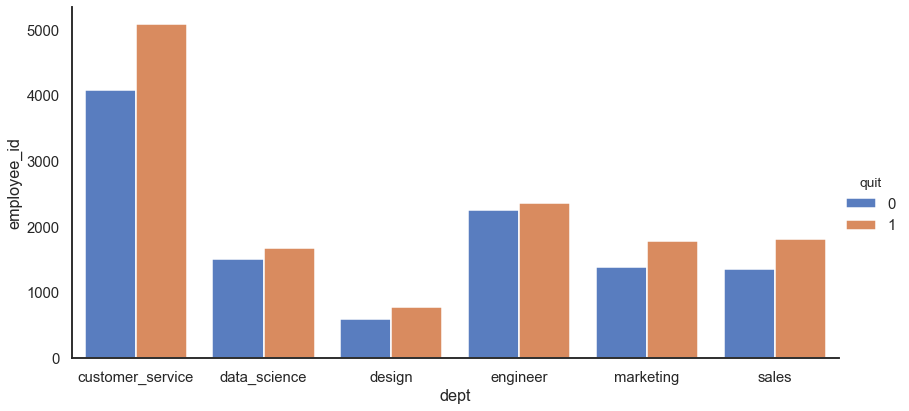

In [373]:
df_temp = df.groupby(['dept','quit']).count().reset_index()
sns.catplot(data = df_temp , x = 'dept', y = 'employee_id', hue = 'quit',kind = 'bar', height = 6, aspect= 2)
 


,employee_id,company_id,dept,seniority,salary,join_date,quit_date,q_date,j_date,quit,j_w_day,q_w_day
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,2015-10-30,2014-03-24,1,0,4.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,2014-04-04,2013-04-29,1,0,4.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN,NaT,2014-10-13,0,0,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,2013-06-07,2012-05-14,1,0,4.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,2014-08-22,2011-10-17,1,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,NaN,NaT,2015-02-18,0,2,NaN
24698,590087.0,4,engineer,10,160000.0,2015-10-26,NaN,NaT,2015-10-26,0,0,NaN
24699,777612.0,4,customer_service,11,67000.0,2013-09-03,2015-10-23,2015-10-23,2013-09-03,1,1,4.0
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09,2015-01-09,2011-12-13,1,1,4.0


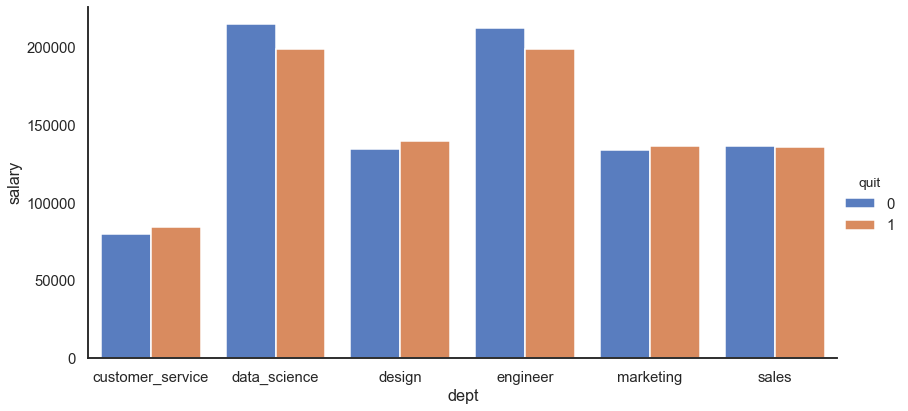

In [374]:
df_temp = df.groupby(['dept','quit']).mean().reset_index()
sns.catplot(data = df_temp , x = 'dept', y = 'salary', hue = 'quit',kind = 'bar', height = 6, aspect= 2)
 
df

In [326]:
company_churn= df.groupby(['company_id']).mean().reset_index()


In [327]:
company_churn

,company_id,employee_id,seniority,salary
0,1,501773.268324,14.141999,152167.570115
1,2,503864.736618,14.297489,155728.090952
2,3,496656.524918,14.054565,122118.588578
3,4,513380.616392,14.023763,122721.144520
4,5,507257.065527,14.474644,123348.717949
5,6,490152.278079,14.089853,119925.639040
6,7,501416.076797,13.906046,121582.516340
7,8,493358.904489,13.867240,122284.622732
8,9,505596.132154,13.778356,123905.306972
9,10,490834.589595,14.089017,121553.757225


In [330]:
company_churn =df.groupby(['company_id','dept']).\
agg( count=('employee_id', 'size'), 
    quit_rate=('quit', 'mean'),
    mean_salary = ('salary','mean')).reset_index()

company_churn = company_churn.round(2)

In [238]:
df_temp = df.groupby(['company_id',]).count()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,q_date,j_date,quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,2015-10-30 00:00:00,2014-03-24,0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,2014-04-04 00:00:00,2013-04-29,0
2,927315.0,4,marketing,14,101000.0,2014-10-13,0,0,2014-10-13,1
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,2013-06-07 00:00:00,2012-05-14,0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,2014-08-22 00:00:00,2011-10-17,0
...,...,...,...,...,...,...,...,...,...,...
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,0,0,2015-02-18,1
24698,590087.0,4,engineer,10,160000.0,2015-10-26,0,0,2015-10-26,1
24699,777612.0,4,customer_service,11,67000.0,2013-09-03,2015-10-23,2015-10-23 00:00:00,2013-09-03,0
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09,2015-01-09 00:00:00,2011-12-13,0


Text(0.5, 1.0, 'Join/quit  - count ')

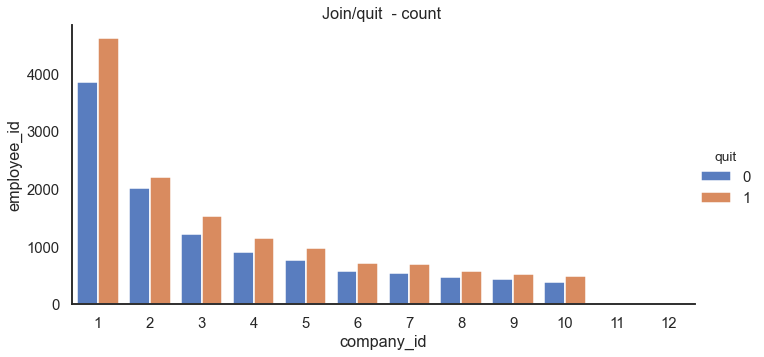

In [331]:
df_temp = df.groupby(['company_id','quit']).count().reset_index()
sns.catplot(x='company_id',y = 'employee_id',hue = 'quit',data = df_temp,kind = 'bar',height = 5,aspect=2)
plt.title("Join/quit  - count ")
#plt.xlabel("companyid")
#sns.
#ax.set_title('Countplot of Quit Month', fontsize=16)
#ax.set_xlabel('Month', fontsize=12)
#ax.set_ylabel('Frequency', fontsize=12)

Text(0.5, 1.0, 'Join/quit  - rate ')

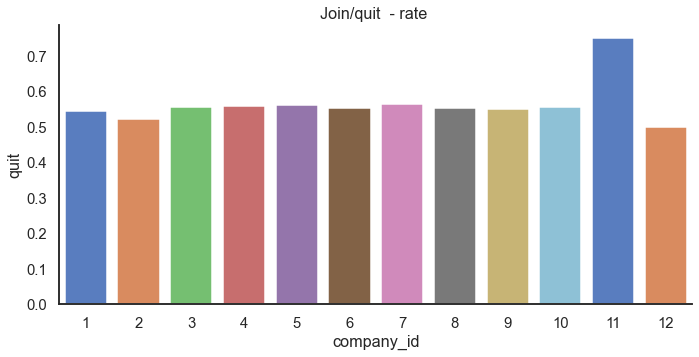

In [332]:
df_temp = df.groupby(['company_id']).mean().reset_index()
sns.catplot(x='company_id',y = 'quit',#,hue = 'quit',
            data = df_temp,palette= 'muted',kind = 'bar',height = 5,aspect=2)
plt.title("Join/quit  - rate ")

Text(0.5, 1.0, 'seniority  - rate ')

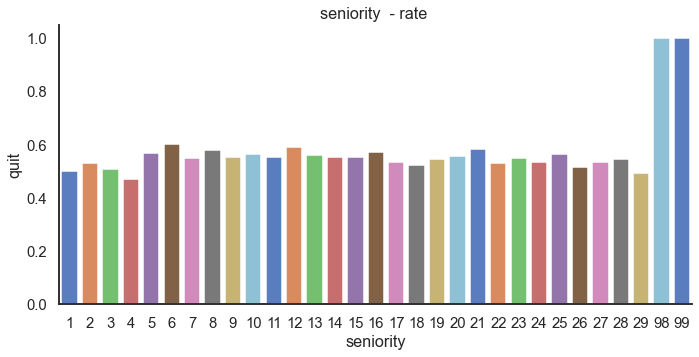

In [333]:
df_temp = df.groupby(['seniority']).mean().reset_index()
sns.catplot(x='seniority',y = 'quit',#,hue = 'quit',
            data = df_temp,palette= 'muted',kind = 'bar',height = 5,aspect=2)
plt.title("seniority  - rate ") 

In [294]:
quit_df['weekday']

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,q_date,j_date,quit
2,927315.0,4,marketing,14,101000.0,2014-10-13,0,1970-01-01,2014-10-13,1
6,88600.0,4,customer_service,21,107000.0,2013-10-21,0,1970-01-01,2013-10-21,1
7,716309.0,2,customer_service,4,30000.0,2014-03-05,0,1970-01-01,2014-03-05,1
9,504159.0,1,sales,7,104000.0,2012-06-12,0,1970-01-01,2012-06-12,1
11,904158.0,2,marketing,17,230000.0,2015-05-11,0,1970-01-01,2015-05-11,1
...,...,...,...,...,...,...,...,...,...,...
24691,965573.0,6,data_science,6,159000.0,2012-09-27,0,1970-01-01,2012-09-27,1
24693,366356.0,9,data_science,10,173000.0,2014-09-11,0,1970-01-01,2014-09-11,1
24694,236400.0,1,customer_service,8,70000.0,2015-07-20,0,1970-01-01,2015-07-20,1
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,0,1970-01-01,2015-02-18,1


# ML checks key factor